In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random

df = pd.read_csv('Rents.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3538 non-null   float64
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3538 non-null   float64
 5   min_to_subway     3539 non-null   int64  
 6   floor             3538 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 221.3 KB


In [4]:
print(df.isnull().values.any())
print(df.isnull().sum().sum())

df = df.dropna()

print(df.isnull().values.any())
print(df.isnull().sum().sum())


True
3
False
0


df

In [5]:
values = [0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5]

#df = df[df.floor.isin(values) == False] 
#df = df[df.bathrooms.isin(values) == False] 
df = df[df.bedrooms.isin(values) == False]
#or df.drop(df.index[df['bedrooms'] % 1 == 0, inplace = True])
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs
0,1545,2550.0,0.0,1,480.0,9,2.0,17
1,2472,11500.0,2.0,2,2000.0,4,1.0,96
2,2919,4500.0,1.0,1,916.0,2,51.0,29
3,2790,4795.0,1.0,1,975.0,3,8.0,31
4,3946,17500.0,2.0,2,4800.0,3,4.0,136
...,...,...,...,...,...,...,...,...
3534,7582,4210.0,1.0,1,532.0,3,8.0,16
3535,5686,6675.0,2.0,2,988.0,5,10.0,9
3536,9679,1699.0,0.0,1,250.0,2,5.0,96
3537,5188,3475.0,1.0,1,651.0,6,5.0,14


In [6]:
#Individual amount of rent (per person)

adj_rents = []

for row in range(len(df.index)):
    if df.iat[row, 2] == 0:
        adj_rents.append(df.iat[row, 1])
    else:
        adj_rents.append(df.iat[row, 1] / df.iat[row, 2])
        
df['adj_rents'] = adj_rents

In [7]:
df.max()

rental_id           11349.0
rent                20000.0
bedrooms                5.0
bathrooms               5.0
size_sqft            4800.0
min_to_subway          43.0
floor                  83.0
building_age_yrs      180.0
adj_rents           13500.0
dtype: float64

In [8]:
# My attempt
"""
col = 0
xValue = 0 
rental = []
rent = []
bedrooms = []
bathrooms = []
size = []
subway = []
floor = []
building = []
adj = []
for row in range(len(df.index)):
    xValue = df.iat[row,col]
    scale = (xValue - df['rental_id'].min())/(df['rental_id'].max() - df['rental_id'].min())
    scale1 = (xValue - df['rent'].min())/(df['rent'].max() - df['rent'].min()) 
    scale2 = (xValue - df['bedrooms'].min())/(df['bedrooms'].max() - df['bedrooms'].min())
    scale3 = (xValue - df['size_sqft'].min())/(df['size_sqft'].max() - df['size_sqft'].min()) 
    scale3 = (xValue - df['size_sqft'].min())/(df['size_sqft'].max() - df['size_sqft'].min()) 
    scale4 = (xValue - df['min_to_subway'].min())/(df['min_to_subway'].max() - df['min_to_subway'].min()) 
    scale5 = (xValue - df['floor'].min())/(df['floor'].max() - df['floor'].min()) 
    scale6 = (xValue - df['building_age_yrs'].min())/(df['building_age_yrs'].max() - df['building_age_yrs'].min()) 
    scale7 = (xValue - df['adj_rents'].min())/(df['adj_rents'].max() - df['adj_rents'].min()) 
    
    rental.append(scale)
    rent.append(scale1)
    bedrooms.append(scale2)
    bathrooms.append(scale3)
    size.append(scale4)
    subway.append(scale5)
    floor.append(scale6)
    building.append(scale7)
    adj.append(scale8)
    

"""


"\ncol = 0\nxValue = 0 \nrental = []\nrent = []\nbedrooms = []\nbathrooms = []\nsize = []\nsubway = []\nfloor = []\nbuilding = []\nadj = []\nfor row in range(len(df.index)):\n    xValue = df.iat[row,col]\n    scale = (xValue - df['rental_id'].min())/(df['rental_id'].max() - df['rental_id'].min())\n    scale1 = (xValue - df['rent'].min())/(df['rent'].max() - df['rent'].min()) \n    scale2 = (xValue - df['bedrooms'].min())/(df['bedrooms'].max() - df['bedrooms'].min())\n    scale3 = (xValue - df['size_sqft'].min())/(df['size_sqft'].max() - df['size_sqft'].min()) \n    scale3 = (xValue - df['size_sqft'].min())/(df['size_sqft'].max() - df['size_sqft'].min()) \n    scale4 = (xValue - df['min_to_subway'].min())/(df['min_to_subway'].max() - df['min_to_subway'].min()) \n    scale5 = (xValue - df['floor'].min())/(df['floor'].max() - df['floor'].min()) \n    scale6 = (xValue - df['building_age_yrs'].min())/(df['building_age_yrs'].max() - df['building_age_yrs'].min()) \n    scale7 = (xValue - df['

In [9]:
for column in df.columns:
    df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())
    
df

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,adj_rents
0,0.136059,0.066845,0.0,0.2,0.050549,0.209302,0.024096,0.094444,0.139489
1,0.217748,0.545455,0.4,0.4,0.384615,0.093023,0.012048,0.533333,0.390963
2,0.257138,0.171123,0.2,0.2,0.146374,0.046512,0.614458,0.161111,0.292731
3,0.245770,0.186898,0.2,0.2,0.159341,0.069767,0.096386,0.172222,0.315914
4,0.347638,0.866310,0.4,0.4,1.000000,0.069767,0.048193,0.755556,0.626719
...,...,...,...,...,...,...,...,...,...
3534,0.668047,0.155615,0.2,0.2,0.061978,0.069767,0.096386,0.088889,0.269941
3535,0.500969,0.287433,0.4,0.4,0.162198,0.116279,0.120482,0.050000,0.201375
3536,0.852838,0.021337,0.0,0.2,0.000000,0.046512,0.060241,0.533333,0.072613
3537,0.457085,0.116310,0.2,0.2,0.088132,0.139535,0.060241,0.077778,0.212181


<AxesSubplot:>

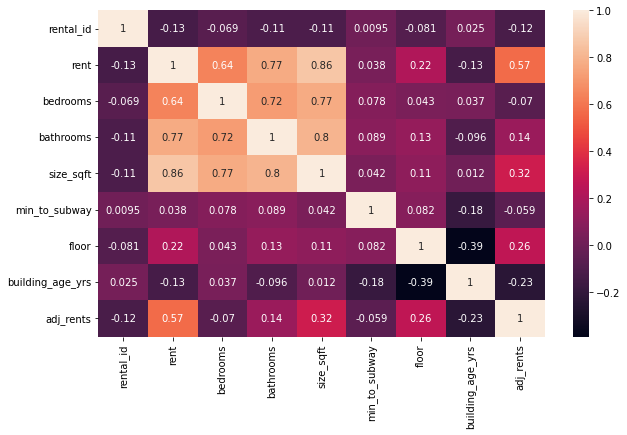

In [10]:
cor = df.corr()

plt.figure(figsize = (10,6))
sns.heatmap(data = cor, annot = True)

In [11]:
df.drop(columns = ['rental_id','min_to_subway','floor','building_age_yrs'], axis =1 , inplace =True)


In [12]:
def testTrainSplit(df):
  length = len(df.index)
  splitLimit = int(length * 0.7)
  train = df[0: splitLimit]
  test = df[splitLimit + 1: length]
  return train, test

In [13]:
train,test = testTrainSplit(df)

In [14]:
df

,rent,bedrooms,bathrooms,size_sqft,adj_rents
0,0.066845,0.0,0.2,0.050549,0.139489
1,0.545455,0.4,0.4,0.384615,0.390963
2,0.171123,0.2,0.2,0.146374,0.292731
3,0.186898,0.2,0.2,0.159341,0.315914
4,0.866310,0.4,0.4,1.000000,0.626719
...,...,...,...,...,...
3534,0.155615,0.2,0.2,0.061978,0.269941
3535,0.287433,0.4,0.4,0.162198,0.201375
3536,0.021337,0.0,0.2,0.000000,0.072613
3537,0.116310,0.2,0.2,0.088132,0.212181


In [47]:
def sumOfDist(w1,w2,b,train):
    sum = 0
    for row in range(0, len(train.index)):
        x1 = train.iat[row, 1]
        x2 = train.iat[row,3]
        distance = (abs((w1 * x1) + (w2 *x2) + b))/(math.sqrt((w1*w1) + (w2*w2))) #distance formula
        sum = sum + distance
        
    return sum
    

In [103]:
#prediction = b + (w1 * x1) + (w2 * x2)


def trainMultipleRegression(train):
    count = 0
    slope1 = {}
    slope2 = {}
    yint = {}
    while count < 1000:
        w1 =  float(random.random()) # Slope! #change this
        w2 =  float(random.random()) #change this
        b = float(random.random()) #change this
        sum1 = sumOfDist(w1,w2,b,train)
       #sum2 = sumOfDist(w1,w2,b,train)
        slope1[w1,w2,b] = sum1
        # slope2[w2] = sum2
        count = count + 1
        
        
    return slope1
   #print(slope1) 
   # print((slope2))
   # print(yint)




In [104]:
#x = trainMultipleRegression(train) #y =  0.003596804322131386 + (0.016654845233009197 * x1) +(0.3488889938961318 * x2)
dict(sorted(trainMultipleRegression(train).items(), key=lambda item: item[1]))

{(0.016654845233009197,
  0.3488889938961318,
  0.003596804322131386): 424.7563481239553,
 (0.06974714263544812,
  0.8448165071476663,
  0.0024905984448045926): 428.8143097766739,
 (0.09468613874845466,
  0.9463197946673038,
  0.007063406504992931): 450.6380352719202,
 (0.04721826422724673,
  0.3219663864808737,
  0.0002352943907150129): 462.30055599223573,
 (0.002478604091922687,
  0.6616554047316241,
  0.046884050517040365): 544.1840420264798,
 (0.017901857654260334,
  0.8303670416162363,
  0.05641103340350129): 548.6934807390907,
 (0.05315761138480568,
  0.26249225915270613,
  0.006968546985357205): 556.0235724062121,
 (0.06501583511875975,
  0.9281646967883481,
  0.0599988371410739): 571.440789734009,
 (0.107765477591101,
  0.4407313768698784,
  0.0107873552977239): 573.1421498134289,
 (0.2981865318554099,
  0.8939350988769105,
  0.007674905986991276): 578.7255871934015,
 (0.06109463923777336,
  0.3644126578417298,
  0.017264225776458253): 586.9868366953772,
 (0.3473384930474265,
 